# Setup

In [1]:
GAME = 'SpaceInvaders-v4'
frames_to_play = 5000000

In [2]:
import base
from src.agents import DoubleDeepQAgent
from src.util import JupyterCallback
from src.downsamplers import downsample_space_invaders

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
import os
import gym
import pandas as pd
%matplotlib inline

In [4]:
out_dir = 'results/{}'.format(DoubleDeepQAgent.__name__)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

# Environment

In [5]:
env = gym.make(GAME)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DoubleDeepQAgent(env, downsample_space_invaders, render_mode='rgb_array')
agent

DoubleDeepQAgent(
    env=<TimeLimit<AtariEnv<SpaceInvaders-v4>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=250000,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2b3980439668>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x2b397a645378>,
    image_size=(84, 84),
    render_mode='rgb_array',
    target_update_freq=10000
)

## Initial

In [9]:
initial = agent.play()
initial = pd.Series(initial)
initial

100%|██████████| 100/100 [03:07<00:00,  1.88s/game]


0     12.0
1     17.0
2     16.0
3     10.0
4     16.0
5     14.0
6     18.0
7     16.0
8     12.0
9      3.0
10    14.0
11     8.0
12    17.0
13     4.0
14    16.0
15     3.0
16     4.0
17    24.0
18    19.0
19     9.0
20    17.0
21    16.0
22    13.0
23    20.0
24    15.0
25    15.0
26    11.0
27    12.0
28     5.0
29    17.0
      ... 
70    15.0
71    15.0
72    15.0
73    10.0
74    19.0
75    20.0
76    22.0
77    21.0
78    16.0
79    23.0
80     9.0
81    19.0
82    30.0
83     4.0
84    16.0
85    17.0
86    11.0
87    11.0
88    13.0
89     2.0
90     9.0
91     0.0
92    12.0
93    16.0
94    12.0
95     2.0
96     9.0
97    15.0
98    11.0
99    17.0
Length: 100, dtype: float64

In [10]:
initial.to_csv('{}/initial.csv'.format(out_dir))

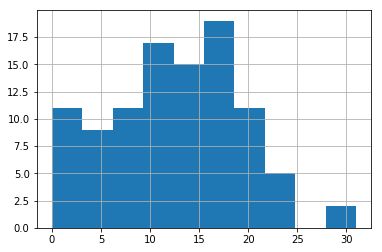

In [11]:
initial.hist()

In [12]:
initial.describe()

count    100.000000
mean      12.700000
std        6.554357
min        0.000000
25%        9.000000
50%       13.000000
75%       17.000000
max       31.000000
dtype: float64

## Training

In [13]:
agent.observe()

100%|██████████| 50000/50000 [00:40<00:00, 1234.10frame/s]


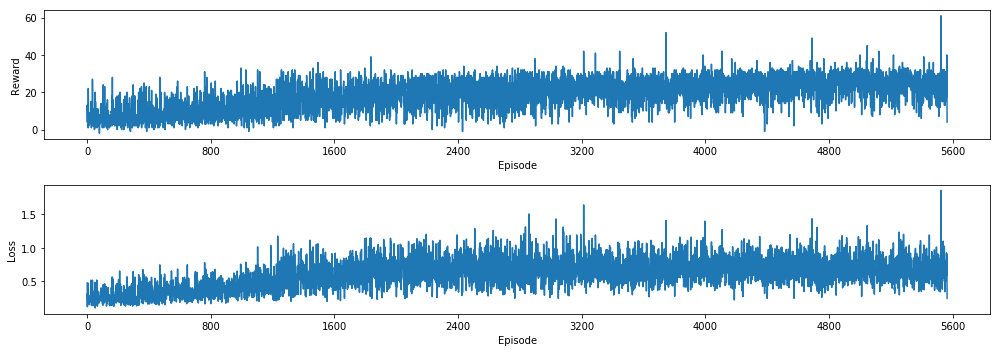

100%|██████████| 5000000/5000000 [7:53:13<00:00, 170.54frame/s, loss=0.241, score=4] 


In [14]:
callback = JupyterCallback()
agent.train(frames_to_play=frames_to_play, callback=callback)

## Final

In [15]:
final = agent.play()
final = pd.Series(final)
final

100%|██████████| 100/100 [03:58<00:00,  2.38s/game]


0     29.0
1     26.0
2     25.0
3      7.0
4     31.0
5     34.0
6     28.0
7     29.0
8     32.0
9     31.0
10    29.0
11    31.0
12    28.0
13    33.0
14    22.0
15    27.0
16    18.0
17    16.0
18    23.0
19    33.0
20    31.0
21    12.0
22    22.0
23    29.0
24    32.0
25    24.0
26    11.0
27    28.0
28    33.0
29    38.0
      ... 
70    22.0
71    20.0
72    30.0
73    32.0
74    27.0
75    28.0
76    32.0
77    29.0
78    31.0
79    19.0
80    20.0
81    31.0
82    28.0
83    28.0
84    32.0
85    33.0
86    19.0
87    25.0
88    53.0
89    25.0
90    12.0
91    13.0
92    28.0
93    16.0
94    29.0
95    31.0
96    38.0
97    31.0
98    31.0
99    28.0
Length: 100, dtype: float64

In [16]:
final.to_csv('{}/final.csv'.format(out_dir))

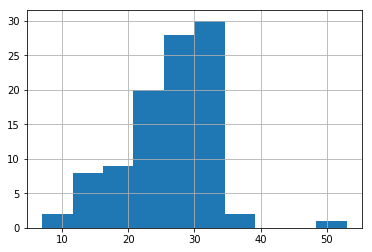

In [17]:
final.hist()

In [18]:
final.describe()

count    100.000000
mean      26.220000
std        6.733873
min        7.000000
25%       22.750000
50%       28.000000
75%       31.000000
max       53.000000
dtype: float64

## Saving Weights

In [19]:
agent.model.save_weights('{}/weights.h5'.format(out_dir), overwrite=True)